<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [93]:
import requests
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"

local_file_name = "m4_survey_data.sqlite"

try:
    # Send a GET request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for HTTP errors

    # Save the content of the response to a local file
    with open(local_file_name, 'wb') as file:
        file.write(response.content)

    print(f"SQLite database downloaded and saved as '{local_file_name}'.")

except requests.exceptions.RequestException as e:
    print(f"Error downloading the database: {str(e)}")

SQLite database downloaded and saved as 'm4_survey_data.sqlite'.


Connect to the database.


In [94]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [95]:
import pandas as pd

## Demo: How to run an sql query


In [96]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [97]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [98]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [99]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [100]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")
cursor = conn.cursor()

# Get a list of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Iterate through the tables and check if they contain the ConvertedComp column
for table in tables:
    table_name = table[0]
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    column_names = [column[1] for column in columns]
    
    if "ConvertedComp" in column_names:
        print(f"Table '{table_name}' contains the 'ConvertedComp' column.")

# Close the database connection
conn.close()

Table 'master' contains the 'ConvertedComp' column.


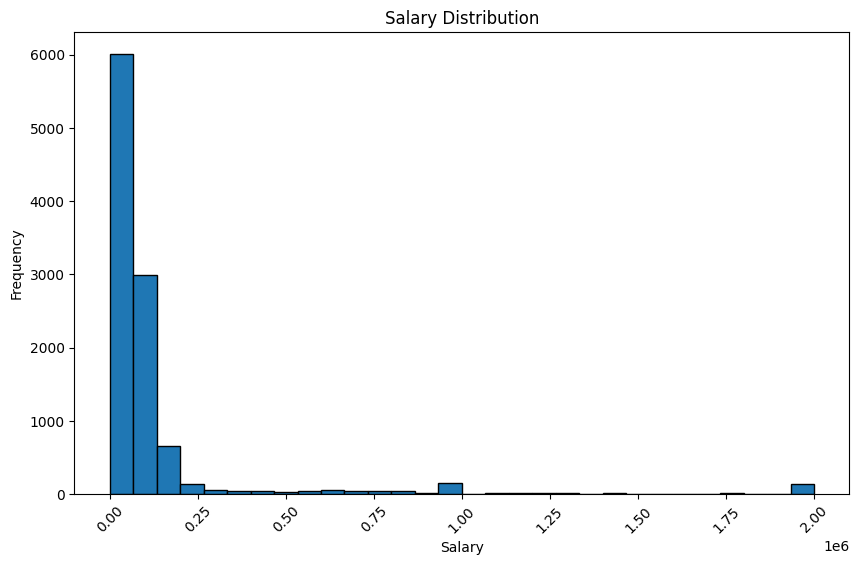

In [101]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the database to select the ConvertedComp column from the master table
query = "SELECT ConvertedComp FROM master"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


# Plot a histogram
plt.figure(figsize=(10, 6))
plt.hist(df["ConvertedComp"], bins=30, edgecolor="k")
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")

# Set x-axis ticks from 0 to 2,000,000 with intervals of 250,000
plt.xticks(range(0, 2000001, 250000), rotation=45)

plt.show()


### Box Plots


Plot a box plot of `Age.`


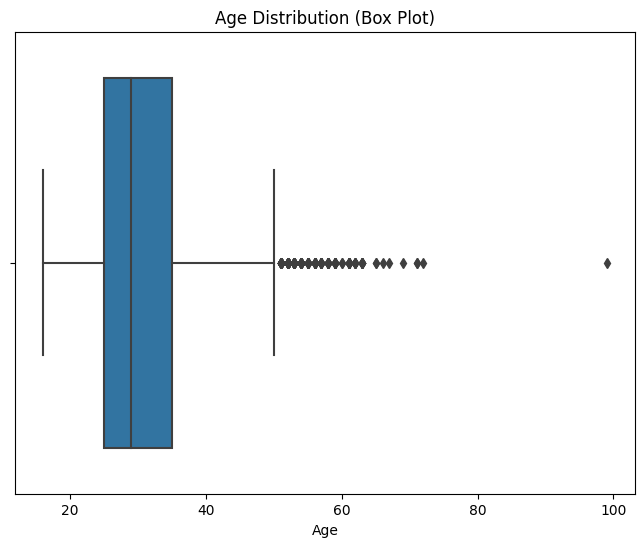

In [102]:
import seaborn as sns
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the database to select the Age column from the master table
query = "SELECT Age FROM master"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Create a box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Age", orient="h")
plt.title("Age Distribution (Box Plot)")
plt.xlabel("Age")
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


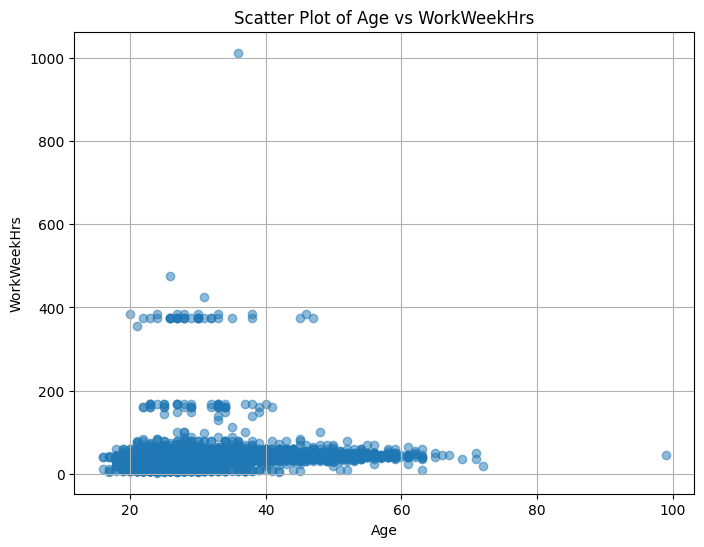

In [103]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the database to select the Age and WorkWeekHrs columns from the master table
query = "SELECT Age, WorkWeekHrs FROM master"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["Age"], df["WorkWeekHrs"], alpha=0.5)
plt.title("Scatter Plot of Age vs WorkWeekHrs")
plt.xlabel("Age")
plt.ylabel("WorkWeekHrs")
plt.grid(True)
plt.show()



In [31]:
import numpy as np  
from scipy.stats import pearsonr  

In [105]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the database to select the Age and WorkWeekHrs columns from the master table
query = "SELECT Age, WorkWeekHrs FROM master"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Remove rows with missing values
df = df.drop_duplicates()
df = df.dropna()

correlation_matrix = df.corr()
age_workweek_corr = correlation_matrix.loc["Age", "WorkWeekHrs"]
corr_coefficient, p_value = pearsonr(df["Age"], df["WorkWeekHrs"])

# Print the correlation coefficient
print(f"Correlation Coefficient: {corr_coefficient:.4f}")

Correlation Coefficient: 0.0007


In [106]:
# Answer on Lab was Difficult to clearly identify from the scatter plot.

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


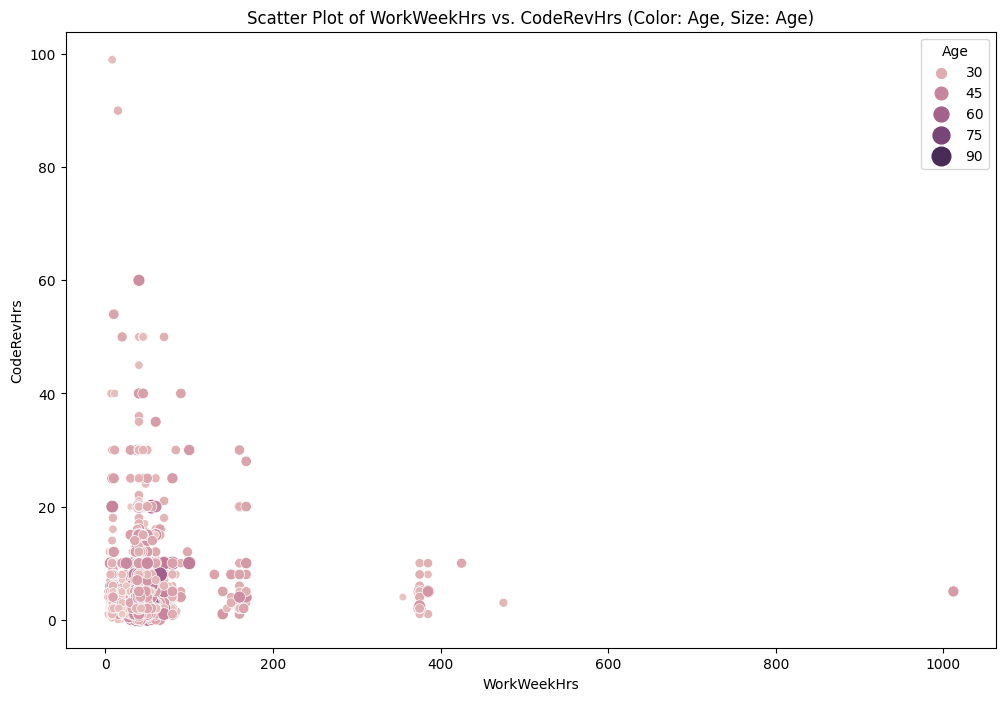

In [107]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the database to select the required columns
query = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Create the scatter plot using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x="WorkWeekHrs", y="CodeRevHrs", hue="Age", data=df, size="Age", sizes=(20, 200))
plt.title("Scatter Plot of WorkWeekHrs vs. CodeRevHrs (Color: Age, Size: Age)")
plt.xlabel("WorkWeekHrs")
plt.ylabel("CodeRevHrs")

# Show the plot
plt.show()



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [108]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the sqlite_master table to find tables with DatabaseWorkedWith column
query = "SELECT name FROM sqlite_master WHERE type='table' AND sql LIKE '%DatabaseDesireNextYear%'"
cursor = conn.cursor()
cursor.execute(query)

# Fetch the table names that contain DatabaseWorkedWith column
tables_with_column = cursor.fetchall()

# Close the database connection
conn.close()

# Print the table names
for table in tables_with_column:
    print(table[0])

DatabaseDesireNextYear


DatabaseDesireNextYear
PostgreSQL              4328
MongoDB                 3649
Redis                   3331
MySQL                   3281
Elasticsearch           2856
Microsoft SQL Server    2706
SQLite                  2437
Firebase                1650
MariaDB                 1385
DynamoDB                1044
Cassandra               1003
Oracle                   870
Other(s):                645
Couchbase                390
Name: count, dtype: int64


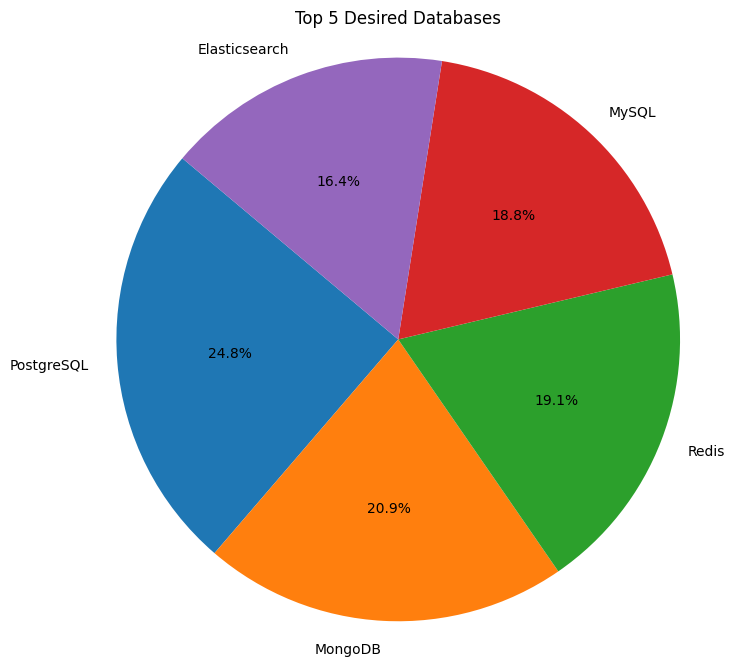

In [79]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the entire "master" table
query = "SELECT * FROM DatabaseDesireNextYear"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()
top_5_databases  = df['DatabaseDesireNextYear'].value_counts().head(5)
print(df['DatabaseDesireNextYear'].value_counts())
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_databases, labels=top_5_databases.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Desired Databases')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the pie chart
plt.show()


In [109]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the entire "master" table
query = "SELECT * FROM LanguageDesireNextYear"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

df['LanguageDesireNextYear'].value_counts()

LanguageDesireNextYear
JavaScript               6630
HTML/CSS                 5328
Python                   5239
SQL                      5012
TypeScript               4088
C#                       3591
Bash/Shell/PowerShell    3097
Java                     2953
Go                       2759
Kotlin                   1890
C++                      1633
Rust                     1520
PHP                      1457
WebAssembly              1397
Swift                    1179
Ruby                     1029
C                        1028
Scala                     879
R                         850
Other(s):                 836
F#                        621
Elixir                    620
Dart                      610
Clojure                   413
Assembly                  336
Objective-C               310
Erlang                    310
VBA                       149
Name: count, dtype: int64

In [118]:
# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Get a list of all tables in the database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = conn.execute(query).fetchall()
table_names = [table[0] for table in tables]

# Find unique tables that contain 'MySQL' in at least one cell
tables_with_mysql = []

for table_name in table_names:
    query = f"SELECT * FROM {table_name};"
    df = pd.read_sql_query(query, conn)
    
    # Check if 'MySQL' is present in any cell of the dataframe
    if df.isin(['MySQL']).any().any():
        tables_with_mysql.append(table_name)

# Get unique table names
unique_tables_with_mysql = list(set(tables_with_mysql))

# Print the unique table names that contain 'MySQL'
for table_name in unique_tables_with_mysql:
    print(table_name)

# Close the database connection
conn.close()


DatabaseDesireNextYear
DatabaseWorkedWith


In [126]:
# Connect to the SQLite database
conn = sqlite3.connect("m4_survey_data.sqlite")

# Query the entire "master" table
query = "SELECT * FROM DatabaseWorkedWith"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Filter the DataFrame to respondents who only appear once and have 'MySQL' in DatabaseWorkedWith
filtered_df = df[df['Respondent'].map(df['Respondent'].value_counts()) == 1]
filtered_df = filtered_df[filtered_df['DatabaseWorkedWith'] == 'MySQL']

# Get the count of such respondents
num_respondents = len(filtered_df)

# Print the resulting DataFrame and the number of respondents
print(f"Filtered DataFrame:\n{filtered_df}")
print(f"Number of respondents who only chose MySQL: {num_respondents}")

Number of rows: 474


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Figure size 1200x800 with 0 Axes>

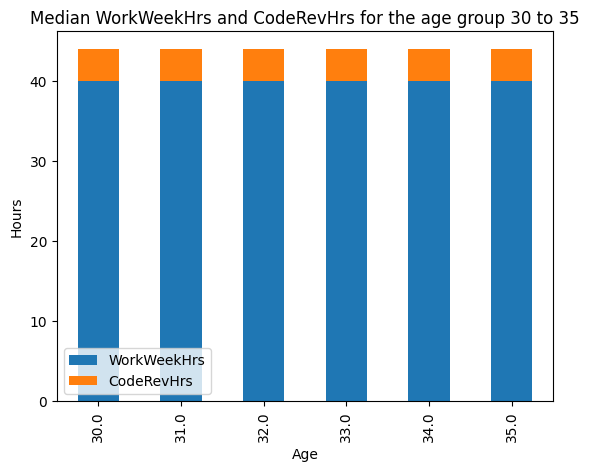

In [61]:
conn = sqlite3.connect('m4_survey_data.sqlite')

query = "SELECT * FROM master"

# Use the pandas `read_sql_query` function to execute the query and create a DataFrame.
df = pd.read_sql_query(query, conn)

conn.close()

# Create a stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35
plt.figure(figsize=(12, 8))
df[df["Age"].between(30, 35)].groupby("Age")[["WorkWeekHrs", "CodeRevHrs"]].median().plot(kind="bar", stacked=True)
plt.title("Median Work-Week-Hrs and Code-Review-Hrs for the age group 30 to 35")
plt.xlabel("Age")
plt.ylabel("Hours")
plt.show()



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


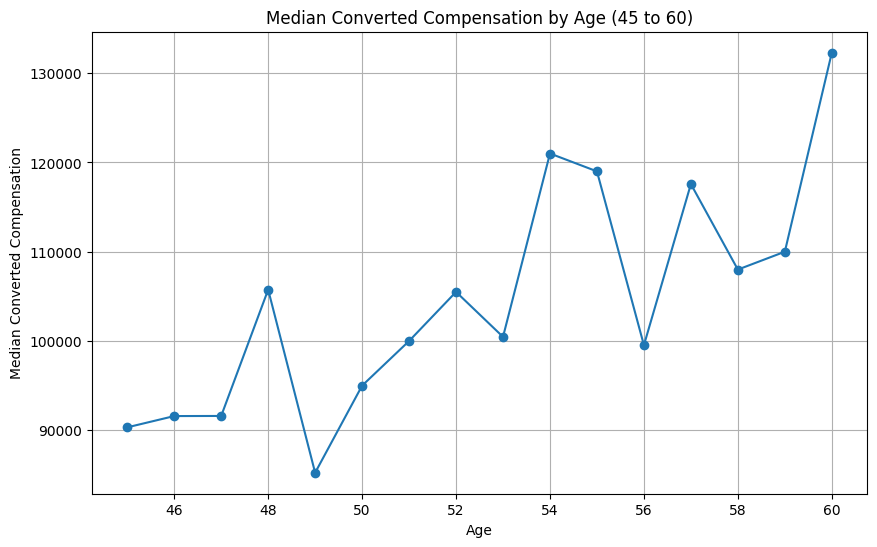

In [62]:
# Filter the DataFrame for ages between 45 and 60
filtered_df = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Group by the 'Age' column and calculate the median 'ConvertedComp'
median_comp_by_age = filtered_df.groupby('Age')['ConvertedComp'].median()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age.index, median_comp_by_age.values, marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.title('Median Converted Compensation by Age (45 to 60)')

# Show the plot
plt.grid(True)
plt.show()




### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


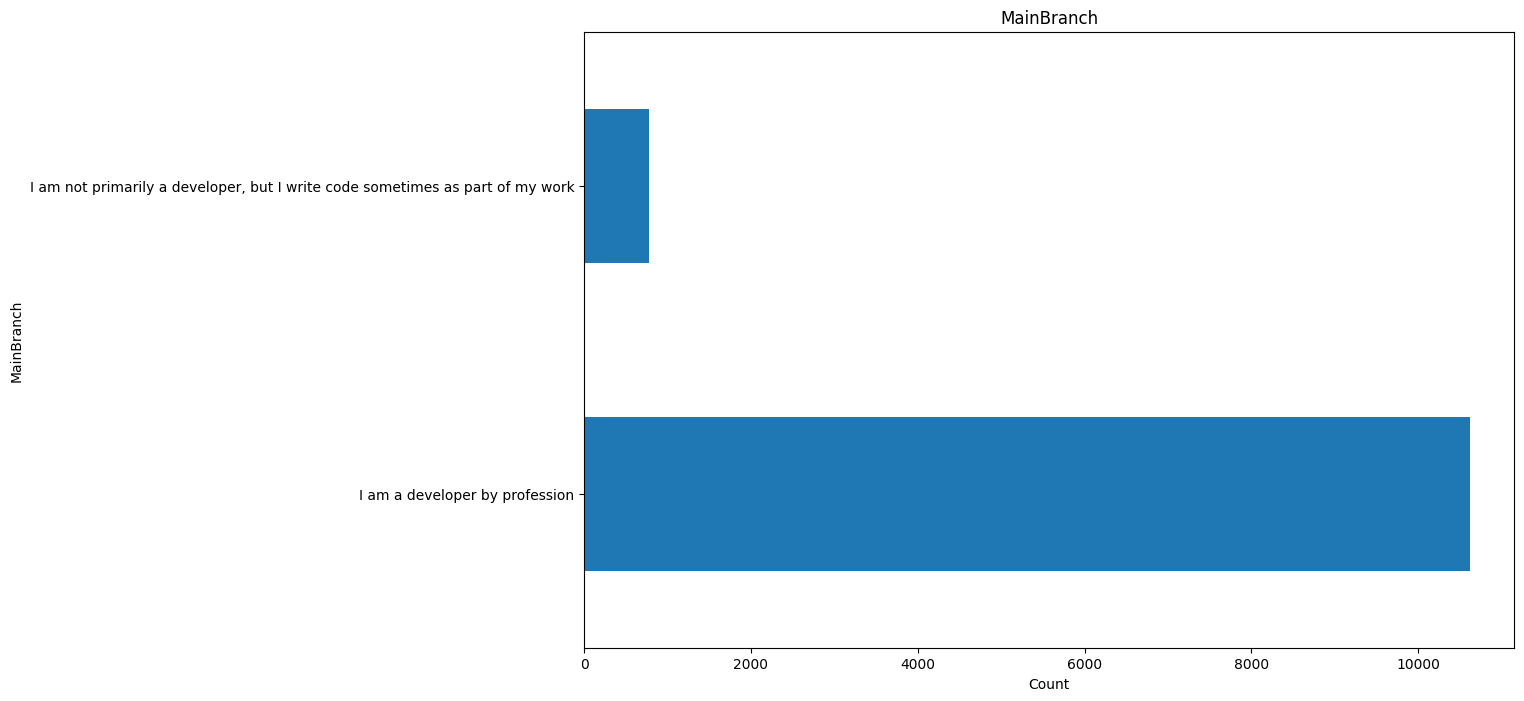

In [66]:
mainbranch_df = df['MainBranch']
mainbranch_df.value_counts().plot(kind='barh', figsize=(12, 8))
plt.title('MainBranch')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.show()



Close the database connection.


In [77]:
# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Define your SQL query
query = "SELECT * FROM DevType"

# Use pd.read_sql_query() to create a DataFrame
df_developer_type = pd.read_sql_query(query, conn)

# Close the database connection when done
conn.close()

df_developer_type['DevType'].value_counts()

DevType
Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or g

In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
